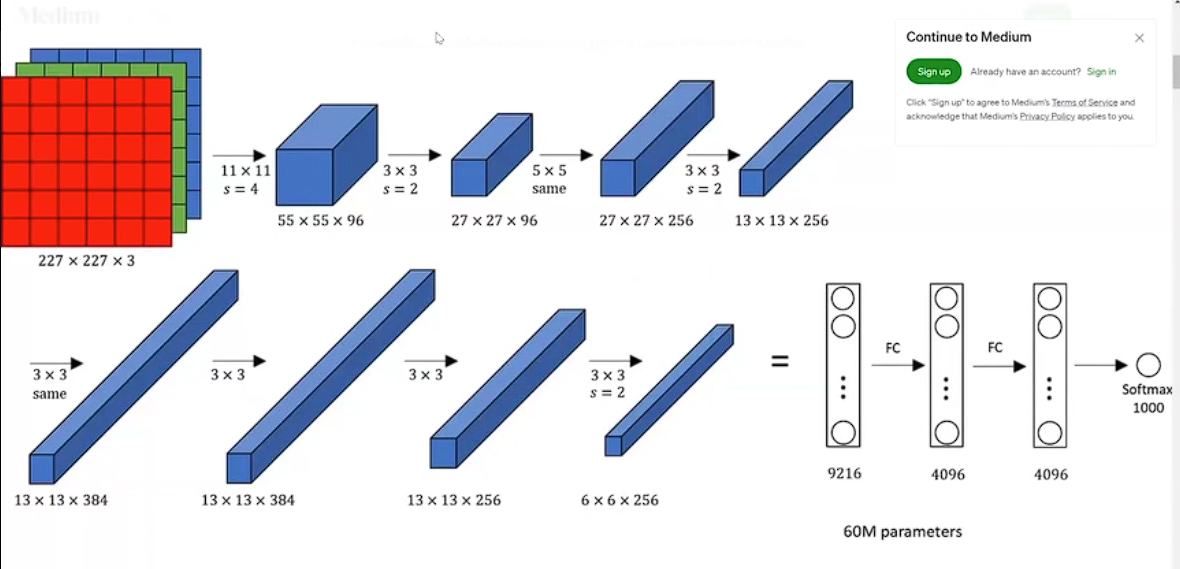

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle(1).json ~/.kaggle

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `cp kaggle(1).json ~/.kaggle'


In [2]:
!kaggle datasets download navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
 73% 11.0M/15.1M [00:00<00:00, 115MB/s]
100% 15.1M/15.1M [00:00<00:00, 140MB/s]


In [3]:
import zipfile
zip = zipfile.ZipFile('/content/brain-mri-images-for-brain-tumor-detection.zip')
zip.extractall('/content')
zip.close()

In [123]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Flatten

In [6]:
folder_path = '/content/brain_tumor_dataset'

In [7]:
os.listdir(folder_path)

['yes', 'no']

In [163]:
no_aug_image = []
for i in os.listdir(os.path.join(folder_path,'no_aug')):
  no_aug_image.append(os.path.join('no_aug',i))
print(len(no_aug_image))




56


In [108]:
no_image[1]

'no/21 no.jpg'

In [82]:
os.listdir(os.path.join(folder_path,'yes'))

['Y98.JPG',
 'Y6.jpg',
 'Y74.jpg',
 'Y40.JPG',
 'Y108.jpg',
 'Y92.jpg',
 'Y50.JPG',
 'Y153.jpg',
 'Y19.JPG',
 'Y148.JPG',
 'Y120.JPG',
 'Y7.jpg',
 'Y8.jpg',
 'Y158.JPG',
 'Y146.JPG',
 'Y66.JPG',
 'Y258.JPG',
 'Y256.JPG',
 'Y95.jpg',
 'Y30.jpg',
 'Y3.jpg',
 'Y186.jpg',
 'Y168.jpg',
 'Y27.jpg',
 'Y104.jpg',
 'Y181.jpg',
 'Y70.jpg',
 'Y28.jpg',
 'Y165.JPG',
 'Y47.JPG',
 'Y31.jpg',
 'Y162.jpg',
 'Y78.jpg',
 'Y156.JPG',
 'Y103.jpg',
 'Y21.jpg',
 'Y12.jpg',
 'Y26.jpg',
 'Y4.jpg',
 'Y109.JPG',
 'Y37.jpg',
 'Y187.jpg',
 'Y53.jpg',
 'Y101.jpg',
 'Y115.JPG',
 'Y252.jpg',
 'Y11.jpg',
 'Y62.jpg',
 'Y51.jpg',
 'Y259.JPG',
 'Y81.jpg',
 'Y73.jpg',
 'Y246.JPG',
 'Y15.jpg',
 'Y32.jpg',
 'Y92.png',
 'Y163.JPG',
 'Y41.jpg',
 'Y38.jpg',
 'Y166.JPG',
 'Y96.jpg',
 'Y155.JPG',
 'Y58.JPG',
 'Y22.jpg',
 'Y69.jpg',
 'Y52.jpg',
 'Y55.jpg',
 'Y117.JPG',
 'Y49.JPG',
 'Y75.JPG',
 'Y111.JPG',
 'Y164.JPG',
 'Y106.jpg',
 'Y251.JPG',
 'Y167.JPG',
 'Y194.jpg',
 'Y257.jpg',
 'Y253.JPG',
 'Y42.jpg',
 'Y244.JPG',
 'Y184.JP

In [169]:
len(image_data)

309

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img

In [164]:
image_data = yes_image + no_image + no_aug_image

In [195]:
image_data_df = pd.DataFrame(image_data, columns = ['image'])

In [166]:
image_data_df.head()

,image
0,yes/Y98.JPG
1,yes/Y6.jpg
2,yes/Y74.jpg
3,yes/Y40.JPG
4,yes/Y108.jpg


In [196]:
x = ['1' if i < 155 else '0' for i in image_data_df.index]

In [197]:
image_data_df['Result'] = x

In [198]:
image_data_df = image_data_df.sample(309)

In [199]:
image_data_df['Result'].value_counts()

,count
Result,
1,155
0,154


In [200]:
image_data_df = image_data_df.reset_index()
image_data_df.drop('index', axis = 1, inplace = True)

In [172]:
image_data_df.head()

,image,Result
0,no/15 no.jpg,0
1,yes/Y58.JPG,1
2,no/46 no.jpg,0
3,yes/Y27.jpg,1
4,no/N19.JPG,0


In [201]:
image_data_train = image_data_df.sample(frac = 1, random_state = 0).iloc[:235]
image_data_test = image_data_df.sample(frac = 1, random_state = 0).iloc[235:]

In [176]:
print(image_data_train.shape, image_data_test.shape)

(235, 2) (74, 2)


In [202]:
image_data_traingen = ImageDataGenerator(rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True)

image_data_testgen = ImageDataGenerator(rescale=1./255)

In [203]:
image_data_train_gen = image_data_traingen.flow_from_dataframe(image_data_train, directory = folder_path,
                                                               x_col = 'image', y_col = 'Result', target_size = (200,200),
                                                            class_mode= 'binary', color_mode = 'grayscale')

image_data_test_gen = image_data_testgen.flow_from_dataframe(image_data_test, directory = folder_path,
                                                               x_col = 'image', y_col = 'Result', target_size = (200,200),
                                                            class_mode= 'binary', color_mode = 'grayscale')

Found 235 validated image filenames belonging to 2 classes.
Found 74 validated image filenames belonging to 2 classes.


# AlexNet Model

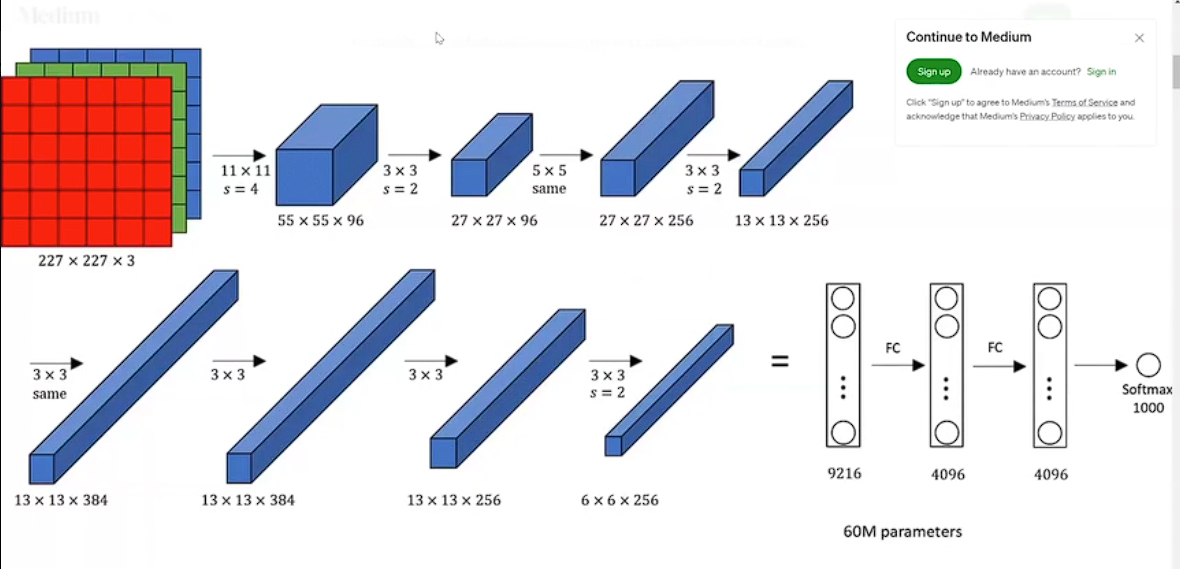

In [204]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu', input_shape = (200,200,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (3,3), strides = 2, padding = 'valid'))
model.add(Conv2D(64, kernel_size = (5,5), strides = 1, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (3,3), strides = 2, padding = 'valid'))
model.add(Conv2D(128, kernel_size = (3,3), strides = 1, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size = (3,3), strides = 1, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size = (3,3), strides = 1, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (3,3), strides = 2, padding = 'valid'))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_82 (Conv2D)                   │ (None, 97, 97, 32)          │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_74               │ (None, 97, 97, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_83 (Conv2D)                   │ (None, 48, 48, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_75               │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_84 (Conv2D)                   │ (None, 23, 23, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_76               │ (None, 23, 23, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_85 (Conv2D)                   │ (None, 23, 23, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_77               │ (None, 23, 23, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_86 (Conv2D)                   │ (None, 23, 23, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_78               │ (None, 23, 23, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 256)                 │       7,930,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,945,281 (34.12 MB)

 Trainable params: 8,943,809 (34.12 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [205]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [206]:
history = model.fit(image_data_train_gen, epochs = 10, batch_size = 64, validation_data = image_data_test_gen)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 849ms/step - accuracy: 0.5301 - loss: 21.1383 - val_accuracy: 0.4324 - val_loss: 12.8858
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.6349 - loss: 6.0284 - val_accuracy: 0.4324 - val_loss: 67.8197
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6695 - loss: 4.3777 - val_accuracy: 0.4324 - val_loss: 47.0793
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.7078 - loss: 2.2091 - val_accuracy: 0.4324 - val_loss: 18.1829
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7150 - loss: 2.6365 - val_accuracy: 0.4324 - val_loss: 22.5671
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.8106 - loss: 2.1052 - val_accuracy: 0.4324 - val_loss: 12.1860
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.7502 - loss: 3.3026 - val_accuracy: 0.4324 - val_loss: 5.1999
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7339 - loss: 2.1022 - val_accuracy: 0.5135 - val_loss: 1.1536
Ep

# VGG 16

In [207]:
model_vgg = Sequential()
model_vgg.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (200,200,1)))
model_vgg.add(BatchNormalization())
model_vgg.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model_vgg.add(BatchNormalization())
model_vgg.add(MaxPooling2D(pool_size = (2,2)))
model_vgg.add(Dropout(0.25))

model_vgg.add(Conv2D(64,kernel_size = (3,3), activation = 'relu'))
model_vgg.add(BatchNormalization())
model_vgg.add(Conv2D(64,kernel_size = (3,3), activation = 'relu'))
model_vgg.add(BatchNormalization())
model_vgg.add(MaxPooling2D(pool_size = (2,2)))
model_vgg.add(Dropout(0.3))

model_vgg.add(Conv2D(128,kernel_size = (3,3), activation = 'relu'))
model_vgg.add(BatchNormalization())
model_vgg.add(Conv2D(128,kernel_size = (3,3), activation = 'relu'))
model_vgg.add(BatchNormalization())
model_vgg.add(MaxPooling2D(pool_size = (2,2)))
model_vgg.add(Dropout(0.4))

model_vgg.add(Flatten())
model_vgg.add(Dense(512, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.01)))
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(1,activation = 'sigmoid'))
model_vgg.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_87 (Conv2D)                   │ (None, 198, 198, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_79               │ (None, 198, 198, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_88 (Conv2D)                   │ (None, 196, 196, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_80               │ (None, 196, 196, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 98, 98, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 98, 98, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_89 (Conv2D)                   │ (None, 96, 96, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_81               │ (None, 96, 96, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_90 (Conv2D)                   │ (None, 94, 94, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_82               │ (None, 94, 94, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 47, 47, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 47, 47, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_91 (Conv2D)                   │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_83               │ (None, 45, 45, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_92 (Conv2D)                   │ (None, 43, 43, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_84               │ (None, 43, 43, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_45 (MaxPooling2D)      │ (None, 21, 21, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 21, 21, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 29,190,625 (111.35 MB)

 Trainable params: 29,189,729 (111.35 MB)

 Non-trainable params: 896 (3.50 KB)

In [208]:
model_vgg.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [209]:
history = model_vgg.fit(image_data_train_gen, epochs = 5, batch_size = 64, validation_data = image_data_test_gen)

Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5038 - loss: 31.5067 - val_accuracy: 0.4459 - val_loss: 14.2199
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.5093 - loss: 22.3481 - val_accuracy: 0.5811 - val_loss: 15.5236
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.6183 - loss: 25.2707 - val_accuracy: 0.5676 - val_loss: 15.1027
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.7384 - loss: 20.6241 - val_accuracy: 0.4324 - val_loss: 18.6112
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.7249 - loss: 21.5643 - val_accuracy: 0.4324 - val_loss: 17.0613


In [210]:
history = model_vgg.fit(image_data_train_gen, epochs = 5, batch_size = 64, validation_data = image_data_test_gen)

Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.6819 - loss: 22.0278 - val_accuracy: 0.5676 - val_loss: 15.7271
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.5895 - loss: 21.1728 - val_accuracy: 0.4324 - val_loss: 17.4794
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.7327 - loss: 20.0337 - val_accuracy: 0.4324 - val_loss: 23.4913
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.7464 - loss: 19.5476 - val_accuracy: 0.5676 - val_loss: 16.4731
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.7026 - loss: 17.6621 - val_accuracy: 0.4324 - val_loss: 17.5862


In [157]:
history = model_vgg.fit(image_data_train_gen, epochs = 5, batch_size = 64, validation_data = image_data_test_gen)

Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - accuracy: 0.6752 - loss: 17.9109 - val_accuracy: 0.6981 - val_loss: 21.1966
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.6428 - loss: 15.8602 - val_accuracy: 0.6981 - val_loss: 16.9483
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.6377 - loss: 15.5662 - val_accuracy: 0.6981 - val_loss: 17.9341
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.6212 - loss: 14.8345 - val_accuracy: 0.6981 - val_loss: 17.2233
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.6216 - loss: 13.8361 - val_accuracy: 0.6981 - val_loss: 15.3521


In [158]:
minority_class_dir = folder_path +'/'+'no'  # Replace with the directory of 'no' images
output_dir = folder_path +'/'+'no_aug'  # Directory to save augmented images
os.makedirs(output_dir, exist_ok=True)

In [160]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [162]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img
import numpy as np

num_augmented_images = 57
image_files = os.listdir(minority_class_dir)
image_count = 0

for image_file in image_files:
    # Load image
    img_path = os.path.join(minority_class_dir, image_file)
    img = load_img(img_path, target_size=(200, 200))  # Ensure consistent size
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    for batch in datagen.flow(img_array, batch_size=1, save_to_dir=output_dir,
                              save_prefix='aug', save_format='jpeg'):
        image_count += 1
        if image_count >= num_augmented_images:
            break

    if image_count >= num_augmented_images:
        break

print(f"Generated {image_count} augmented images for the 'no' class.")

Generated 57 augmented images for the 'no' class.
